<a href="https://colab.research.google.com/github/Fucksky-Zhao/ForumTextAnalysis/blob/master/textAnalysis/ForumText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls

chineseStopWords.txt	     ForumText.ipynb	 lufei.jpeg  simkai.ttf
cmb_main_content_tf-idf.jpg  item_cmb_utf_8.csv  peiqi.png   userdict.txt


In [0]:
# 指定当前的工作文件夹
import os

# 此处为google drive中的文件路径,drive为之前指定的工作根目录，要加上
os.chdir("./drive/My Drive/text analysis") 

FileNotFoundError: ignored

In [0]:
!ls

chineseStopWords.txt	     ForumText.ipynb	 lufei.jpeg  simkai.ttf
cmb_main_content_tf-idf.jpg  item_cmb_utf_8.csv  peiqi.png   userdict.txt


In [0]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [0]:
!ls

chineseStopWords.txt	     ForumText.ipynb	 lufei.jpeg  simkai.ttf
cmb_main_content_tf-idf.jpg  item_cmb_utf_8.csv  peiqi.png   userdict.txt


In [0]:
df=pd.read_csv("item_cmb_utf_8.csv", error_bad_lines=False, encoding='utf-8', header=None, names=['author', 'content','post_time', 'title', 'url'])
print(df.shape)
df.info()

(273159, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273159 entries, 0 to 273158
Data columns (total 5 columns):
author       273159 non-null object
content      263151 non-null object
post_time    273159 non-null object
title        273159 non-null object
url          273159 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


In [0]:
df.head()

,author,content,post_time,title,url
0,csgxkjb,有过QQ钱包卡的朋友吗？这个卡需要业务员上门吗？,2019-3-21 00:45:42,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html
1,渊太郎,我21号网点PAD，到现在还是申请已受理，没有下文了~这是正常的么？一般转到审核，需要几天呀...,2018-12-24 09:42:05,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html
2,csgxkjb,申请过的朋友来说下。,2019-3-21 09:43:45,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html
3,chensy2009,NaN,2019-3-22 00:09:33,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html
4,kashen07597615,我19号申请还是一样,2018-12-24 09:44:07,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html


In [0]:
# df_main表示仅仅含有楼主发帖主贴的内容
df_main = df.sort_values('post_time', ascending=True).groupby('title', as_index=False).first()

In [0]:
df_main.head(20)

In [0]:
df_main.info()

In [0]:
df.columns

In [0]:
df.head()

In [0]:
df['author'].value_counts()

In [0]:
df.isnull().sum() / df.shape[0]

In [0]:
df.describe()

In [0]:
!ls

chineseStopWords.txt	     ForumText.ipynb	 lufei.jpeg  simkai.ttf
cmb_main_content_tf-idf.jpg  item_cmb_utf_8.csv  peiqi.png   userdict.txt


In [0]:
import warnings
warnings.filterwarnings('ignore')
import jieba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(12.0,12.0)
from wordcloud import WordCloud,ImageColorGenerator
import imageio

jieba.load_userdict("./userdict.txt")

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.162 seconds.
Prefix dict has been built succesfully.


In [0]:
#1.读取数据，jieba分词
df1=df.dropna()
content=df1.title.values.tolist()
segment=[]
for line in content:
    try:
        segs=jieba.cut(line, cut_all=False)
        for seg in segs:
            if seg=="招商" or seg=="招商银行":
                segment.append("招行")
            elif seg=="E招贷" or seg=="招贷":
                segment.append("e招贷")
            elif seg=="E闪贷" or seg=="闪贷":
                segment.append("e闪贷")
            elif seg=="E分期" or seg=="e分期":
                segment.append("e分期")
            elif len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print(line)
        continue
word_df1=pd.DataFrame({'segment':segment})

In [0]:
# word_df1[word_df1 == 'e招贷'].isnull().sum() / word_df1.shape[0]

segment    0.996369
dtype: float64

In [0]:
#2.去掉停止词
stopword = pd.read_csv('chineseStopWords.txt',sep='\t',names=['stopword'],encoding='gbk')
word_df1 = word_df1[~word_df1.segment.isin(stopword.stopword)]

In [0]:
#3.获取词频
word_stat = word_df1.groupby(by=['segment'])['segment'].agg({'计数':np.size})
word_stat = word_stat.reset_index().sort_values(by=['计数'],ascending=False)
len(word_stat)

8039

In [0]:
#4.添加自定义的背景图
from PIL import Image

bimg = imageio.imread('./lufei.jpeg')
# mask = np.array(Image.open('./images.jpeg'))

# wordcloud = WordCloud(background_color="white", font_path='./simkai.ttf', mask=bimg, max_font_size=40, min_font_size=15, max_words=2000, margin=2)
wordcloud = WordCloud(background_color="white", font_path='./simkai.ttf', mask=bimg, max_font_size=100, min_font_size=20, max_words=2000, margin=2)

word_frequence = {x[0]:x[1] for x in word_stat.values}
wordcloud = wordcloud.generate_from_frequencies(word_frequence)

print(len(word_frequence))

8039


In [0]:
{x[0]:x[1] for x in word_frequence.items() if x[1] > 100}

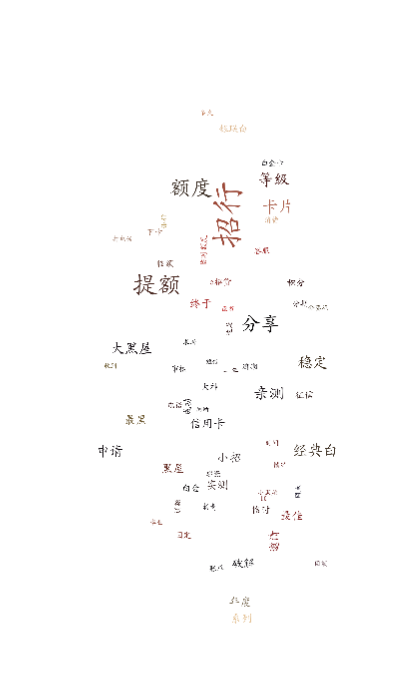

In [0]:
#引入颜色生成器
bimgcolor=ImageColorGenerator(bimg)
#5.显示结果
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgcolor))#重新填充
# plt.imshow(wordcloud)
plt.show()

In [0]:
wordcloud.to_file('title_frequency.jpg')

In [0]:
!pip install jieba

In [0]:
# tf-idf提取主题帖正文的关键词 只取前20个关键词，查看在16809个主题帖内容中前二十个关键词的分布情况
import jieba.analyse

df2=df_main.dropna()
content=df2.content.values.tolist()
segment={}
for line in content:
    try:
        keywords = jieba.analyse.extract_tags(line, topK=20, withWeight=True, allowPOS=('n','nr','ns'))
        for item in keywords:
            if item[0] == "招商" or item[0] == "招商银行":
                segment["招行"] = 1 + segment.get("招行", 0)
            elif item[0] == "E招贷" or item[0] == "招贷":
                segment["e招贷"] = 1 + segment.get("e招贷", 0)
            elif item[0]=="E闪贷" or item[0]=="闪贷":
                segment["e闪贷"] = 1 + segment.get("e闪贷", 0)
            elif item[0]=="E分期" or item[0]=="e分期":
                segment["e分期"] = 1 + segment.get("e分期", 0)
            elif len(item[0])>1 and item[0]!='\r\n':
                segment[item[0]] = 1 + segment.get(item[0], 0)
    except:
        print(line)
        continue

In [0]:
# 去掉停止词
print(len(segment))
# stopword = pd.read_csv('chineseStopWords.txt',sep='\t',names=['stopword'],encoding='gbk')

stoplist = {}.fromkeys([ line.strip() for line in open("chineseStopWords.txt", encoding='gbk') ])

segment = {x[0]:x[1] for x in segment.items() if x[0] not in stoplist}
print(len(segment))

5465
5429


In [0]:
{x[0]:x[1] for x in segment.items() if x[1] > 100}

{'上门': 310,
 '下卡': 105,
 '业务员': 365,
 '东西': 109,
 '京东': 177,
 '人工': 127,
 '信息': 207,
 '信用卡': 250,
 '储蓄卡': 252,
 '全币': 103,
 '全额': 115,
 '利息': 132,
 '刷卡': 372,
 '办卡': 148,
 '办法': 214,
 '办理': 390,
 '单位': 188,
 '卡友': 130,
 '原因': 168,
 '名字': 123,
 '商户': 136,
 '地址': 133,
 '大神': 871,
 '大额': 122,
 '大黑': 222,
 '姿势': 134,
 '客户': 160,
 '客服': 823,
 '小昭': 153,
 '小额': 114,
 '帖子': 120,
 '幅度': 129,
 '张卡': 118,
 '情况': 555,
 '感觉': 336,
 '手机': 180,
 '手续费': 208,
 '招行': 296,
 '指点': 149,
 '支付宝': 204,
 '时间': 479,
 '普卡': 208,
 '曲线': 174,
 '月份': 303,
 '朋友': 201,
 '机会': 143,
 '权益': 162,
 '权限': 144,
 '柜台': 105,
 '标准': 134,
 '毕业': 353,
 '民生': 123,
 '流水': 208,
 '电话': 877,
 '白金': 420,
 '白金卡': 287,
 '短信': 640,
 '系统': 128,
 '经典': 121,
 '经验': 112,
 '网点': 621,
 '老哥': 563,
 '菜卡': 142,
 '记录': 163,
 '论坛': 258,
 '证明': 140,
 '调额': 182,
 '谢谢': 354,
 '负债': 176,
 '账单': 1010,
 '账户': 155,
 '资料': 474,
 '身份证': 196,
 '进件': 210,
 '金卡': 411,
 '金葵花': 196,
 '金额': 132,
 '银联': 166,
 '银行': 1041,
 '销卡': 212,
 '问问': 112,
 '降额': 118,
 '面签':

In [0]:
segment["e招贷"]

1

In [0]:
# 添加自定义的背景图
from PIL import Image

bimg = imageio.imread('./peiqi.png')
# mask = np.array(Image.open('./images.jpeg'))

wordcloud = WordCloud(background_color="white", font_path='./simkai.ttf', mask=bimg, max_font_size=40, min_font_size=10, max_words=2000, margin=2)

wordcloud = wordcloud.generate_from_frequencies(segment)

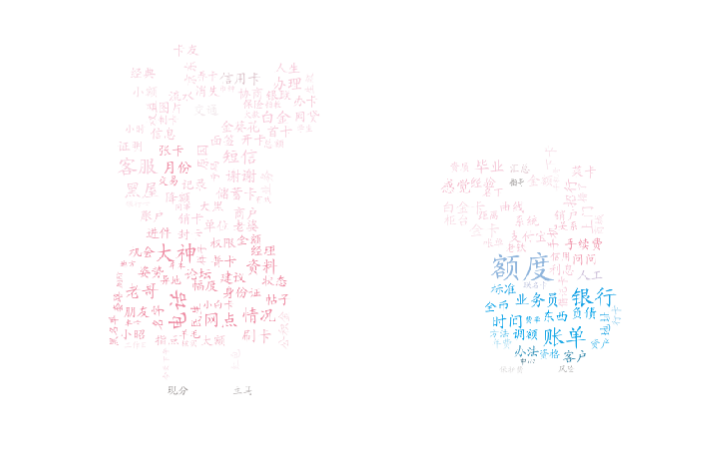

In [0]:
#引入颜色生成器
bimgcolor=ImageColorGenerator(bimg)
#5.显示结果
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgcolor))#重新填充
# plt.imshow(wordcloud)
plt.show()

In [0]:
wordcloud.to_file('cmb_main_content_tf-idf.jpg')

In [0]:
!ls

chineseStopWords.txt  main_content_tf-idf.jpg  title_frequency.jpg
ForumText.ipynb       peiqi.png		       userdict.txt
item_complete.csv     SimHei.ttf
lufei.jpeg	      simkai.ttf


In [0]:
# textRank对正文取前20关键字出现次数统计

df2=df_main.dropna()
content=df2.content.values.tolist()
segment={}
for line in content:
    try:
        keywords = jieba.analyse.textrank(line, topK=20, withWeight=True, allowPOS=('n','nr','ns'))
        for item in keywords:
            if item[0] == "招商" or item[0] == "招商银行":
                segment["招行"] = 1 + segment.get("招行", 0)
            elif item[0] == "E招贷" or item[0] == "招贷":
                segment["e招贷"] = 1 + segment.get("e招贷", 0)
            elif item[0]=="E闪贷" or item[0]=="闪贷":
                segment["e闪贷"] = 1 + segment.get("e闪贷", 0)
            elif item[0]=="E分期" or item[0]=="e分期":
                segment["e分期"] = 1 + segment.get("e分期", 0)
            elif len(item[0])>1 and item[0]!='\r\n':
                segment[item[0]] = 1 + segment.get(item[0], 0)
    except:
        print(line)
        continue

In [0]:
# 去掉停止词
print(len(segment))
# stopword = pd.read_csv('chineseStopWords.txt',sep='\t',names=['stopword'],encoding='gbk')

stoplist = {}.fromkeys([ line.strip() for line in open("chineseStopWords.txt", encoding='gbk') ])

segment = {x[0]:x[1] for x in segment.items() if x[0] not in stoplist}
print(len(segment))

4249
4214


In [0]:
segment['上海']

41

In [0]:
{x[0]:x[1] for x in segment.items() if x[1] > 100}

In [0]:
sorted_x = sorted(segment.items(), key=lambda kv: kv[1], reverse=True)

sorted_x

In [0]:
from PIL import Image

bimg = imageio.imread('./lufei.jpeg')
# mask = np.array(Image.open('./images.jpeg'))

wordcloud = WordCloud(background_color="white", font_path='./simkai.ttf', mask=bimg, max_font_size=100, min_font_size=20, max_words=2000, margin=2)

wordcloud = wordcloud.generate_from_frequencies(segment)

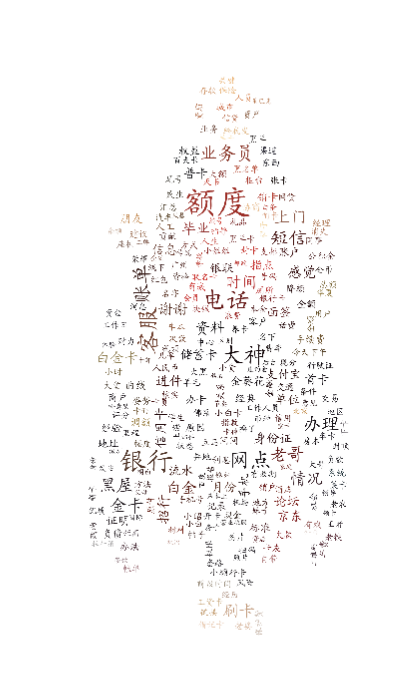

In [0]:
#引入颜色生成器
bimgcolor=ImageColorGenerator(bimg)
#5.显示结果
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgcolor))#重新填充
# plt.imshow(wordcloud)
plt.show()

In [0]:
wordcloud.to_file('new_title_textrank_main_content.jpg')

In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16877 entries, 0 to 16886
Data columns (total 5 columns):
title        16877 non-null object
author       16877 non-null object
content      16877 non-null object
post_time    16877 non-null object
url          16877 non-null object
dtypes: object(5)
memory usage: 791.1+ KB


# LDA主题抽取内容

In [0]:
#1.读取数据，jieba分词

df2=df_main.dropna()

segment=[]
stoplist = {}.fromkeys([ line.strip() for line in open("chineseStopWords.txt", encoding='gbk') ])

def chinese_word_cut(mytext):
    segs=jieba.cut(mytext, cut_all=False)
    segment = []
    for seg in segs:
        if seg=="招商" or seg=="招商银行":
            segment.append("招行")
        elif seg=="E招贷" or seg=="招贷":
            segment.append("e招贷")
        elif seg=="E闪贷" or seg=="闪贷":
            segment.append("e闪贷")
        elif seg=="E分期" or seg=="e分期":
            segment.append("e分期")
        elif len(seg)>1 and seg!='\r\n' and seg not in stoplist:
            segment.append(seg)
    return " ".join(segment)
        
df2["content_cutted"] = df2.content.apply(chinese_word_cut)

In [0]:
df2["content"].head()

0                    --------关------------
1    给我20万的额度  让分24期0.38的费率  这个划算吗？年化合多少了？
2                                   合理？？？？
3                                天天撸会进黑屋吗？
4                中南白卡面太丑了，去星巴克兑星冰乐都不好意思拿出来
Name: content, dtype: object

In [0]:
df2["content_cutted"].head()

0                            
1      20 额度 24 0.38 费率 划算 化合
2                            
3                    天天 会进 黑屋
4    中南 卡面 太丑 星巴克 兑星冰 乐都 不好意思
Name: content_cutted, dtype: object

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


n_features = 1000
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(df2.content_cutted)

In [0]:
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [0]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [0]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [0]:
n_top_words = 20

tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
积分 经典白 消费 银联白 刷卡 多久 10 金葵花 活动 不到 感觉 支付宝 一个 碰瓷 权益 商户 支付 真实 年费 微信
Topic #1:
临时 提额 分期 临额 固定 账单 临时额度 额度 e招贷 固额 黑屋 固定额度 账单分期 提到 延期 12 到期 邀请 账单日 上次
Topic #2:
额度 一年 老哥 请问 大神 白金 有没有 一张 提额 逾期 金卡 小招 谢谢 邀请 招行 毕业 大佬 白金卡 最低 只能
Topic #3:
银行 客服 额度 招行 打电话 信用卡 取现 申请 app 成功 分期 一个 掌上生活 还款 注销 情况 办理 显示 电话 手机
Topic #4:
审核 征信 申请 电话 网点 资料 时间 2019 更新 业务员 短信 面签 上门 收到 工作 显示 昨天 一个 进度 流水



In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=50f575a727db63faf19e9bb940e2068f5ee46abd9d03707add70120b4e0f18d3
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [0]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.092585  0.069023       1        1  29.593008
4      0.275746  0.032126       2        1  21.281178
2     -0.292441  0.119055       3        1  17.033221
3      0.140643  0.147915       4        1  16.544690
0     -0.031363 -0.368119       5        1  15.547902, topic_info=    Category         Freq  Term        Total  loglift  logprob
205  Default  2349.000000    临时  2349.000000  30.0000  30.0000
985  Default  3740.000000    额度  3740.000000  29.0000  29.0000
473  Default  1181.000000    客服  1181.000000  28.0000  28.0000
798  Default  1131.000000    积分  1131.000000  27.0000  27.0000
628  Default  2694.000000    提额  2694.000000  26.0000  26.0000
958  Default  1496.000000    银行  1496.000000  25.0000  25.0000
828  Default  1024.000000   经典白  1024.000000  24.0000  24.0000
470  Default  1142.000000    审核  1142.000000  23.0000  23.0000
207  Default  1340.000000    临额  1340.000000  22.0000  22.0000
411  Default  1263.000000    固定  1263.000000  21.0000  21.0000
536  Default   944.000000    征信   944.000000  20.0000  20.0000
134  Default   815.000000    一年   815.000000  19.0000  19.0000
751  Default   774.000000    消费   774.000000  18.0000  18.0000
206  Default  1120.000000  临时额度  1120.000000  17.0000  17.0000
891  Default  1243.000000    账单  1243.000000  16.0000  16.0000
303  Default  1685.000000    分期  1685.000000  15.0000  15.0000
778  Default  1320.000000    申请  1320.000000  14.0000  14.0000
840  Default   824.000000    网点   824.000000  13.0000  13.0000
779  Default  1158.000000    电话  1158.000000  12.0000  12.0000
112  Default   919.000000   e招贷   919.000000  11.0000  11.0000
957  Default   592.000000   银联白   592.000000  10.0000  10.0000
901  Default   651.000000    资料   651.000000   9.0000   9.0000
881  Default   553.000000    请问   553.000000   8.0000   8.0000
848  Default   606.000000    老哥   606.000000   7.0000   7.0000
784  Default   529.000000    白金   529.000000   6.0000   6.0000
680  Default   573.000000   有没有   573.000000   5.0000   5.0000
413  Default   698.000000    固额   698.000000   4.0000   4.0000
583  Default   745.000000   打电话   745.000000   3.0000   3.0000
323  Default   449.000000    刷卡   449.000000   2.0000   2.0000
135  Default   690.000000    一张   690.000000   1.0000   1.0000
..       ...          ...   ...          ...      ...      ...
769   Topic5   150.606955    生日   151.409113   1.8559  -5.0247
878   Topic5   147.513689    试试   148.329419   1.8557  -5.0454
439   Topic5   145.002742    大额   145.810886   1.8557  -5.0626
489   Topic5   141.668411    小额   142.473331   1.8556  -5.0859
827   Topic5   143.612875    经典   144.435264   1.8555  -5.0722
270   Topic5   139.470565    全币   140.275253   1.8555  -5.1015
426   Topic5   137.705049    境外   138.531043   1.8553  -5.1142
831   Topic5   131.821364    经验   132.636536   1.8551  -5.1579
268   Topic5   119.663207    兑换   120.461993   1.8546  -5.2547
296   Topic5   116.301424    几年   117.115771   1.8543  -5.2832
729   Topic5   113.838608    汇总   114.656793   1.8541  -5.3046
513   Topic5   101.025541    平时   101.834362   1.8533  -5.4240
832   Topic5    96.657161    绑定    97.463251   1.8529  -5.4682
450   Topic5    96.299847    套路    97.113813   1.8528  -5.4719
235   Topic5    95.243153    代发    96.051685   1.8528  -5.4829
995   Topic5    91.207156    麻烦    92.022711   1.8523  -5.5262
903   Topic5    91.049079    资质    91.864452   1.8523  -5.5280
996   Topic5    86.434692   黑名单    87.238861   1.8520  -5.5800
952   Topic5   271.164596   金葵花   275.368067   1.8459  -4.4366
429   Topic5   355.683642    多久   364.490609   1.8368  -4.1653
790   Topic5   198.103773    真实   204.847675   1.8278  -4.7506
744   Topic5   258.664242    活动   328.775713   1.6214  -4.4838
83    Topic5   170.995268    50   211.248514   1.6498  -4.8977
558   Topic5   247.179426    感觉   381.598544   1.4270  -4.5292
541   Topic5   190.204776    微信   298.867094   1.40

In [0]:
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)
print_top_words(lda, tf_feature_names, n_top_words)
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

Topic #0:
电话 征信 客服 更新 时间 打电话 一个 逾期 拒绝 接到 第一次 昨天 50 不用 信息 两个 记录 情况 单位 朋友
Topic #1:
提额 分期 临时 e招贷 额度 黑屋 邀请 固定 临时额度 提到 一年 上次 大黑屋 小黑屋 固定额度 调整 现金分期 客服 账单分期 12
Topic #2:
审核 显示 资料 2019 进去 掌上生活 卡片 进度 app 时间 受理 早上 地址 18 升级 名字 晚上 08 机会 提交
Topic #3:
临时 账单 消费 固定 小招 还款 账单日 提额 昨天 10 刷卡 每月 20 12 真实 上个月 最低 还款日 15 18
Topic #4:
申请 经典白 网点 银联白 业务员 白金 招行 上门 邀请 金卡 工作 白金卡 流水 进件 金葵花 网申 一张 办理 感觉 居然
Topic #5:
银行 积分 招行 信用卡 活动 查询 微信 真的 支付宝 客户 账户 商户 支付 初审 短信 app 手机 储蓄卡 刷卡 办理
Topic #6:
临额 固额 临时额度 延期 取现 到期 固定额度 账单分期 账单 多久 情况 掌上 几天 提固 调额 大黑 每次 手续费 大神 只能
Topic #7:
老哥 有没有 大神 收到 成功 短信 请问 逾期 希望 谢谢 面签 还款 打电话 办法 不到 招行 最低 昨天 一个 还清
Topic #8:
额度 一张 提额 一年 注销 3000 销卡 曲线 首卡 负债 失败 激活 5w 3k 金卡 开卡 5000 普卡 下卡 大神
Topic #9:
影响 大佬 估计 授信 降额 生日 操作 全币 6w 100 东西 过高 问问 一点 汇总 风控 求助 很多 visa 冻结



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.239083 -0.035043       1        1  16.279319
5      0.140338  0.117050       2        1  12.239729
4      0.058533  0.008376       3        1  11.966618
3     -0.201121  0.011221       4        1  10.108090
8     -0.186062 -0.162692       5        1  10.005917
0      0.183734  0.189663       6        1   9.321983
2      0.071689  0.076118       7        1   9.018863
7      0.045128  0.128946       8        1   8.983097
6     -0.125226  0.040637       9        1   7.767643
9      0.252069 -0.374277      10        1   4.308739, topic_info=    Category         Freq  Term        Total  loglift  logprob
985  Default  3685.000000    额度  3685.000000  30.0000  30.0000
205  Default  2386.000000    临时  2386.000000  29.0000  29.0000
207  Default  1407.000000    临额  1407.000000  28.0000  28.0000
958  Default  1467.000000    银行  1467.000000  27.0000  27.0000
303  Default  1657.000000    分期  1657.000000  26.0000  26.0000
628  Default  2683.000000    提额  2683.000000  25.0000  25.0000
470  Default  1154.000000    审核  1154.000000  24.0000  24.0000
779  Default  1168.000000    电话  1168.000000  23.0000  23.0000
778  Default  1294.000000    申请  1294.000000  22.0000  22.0000
891  Default  1286.000000    账单  1286.000000  21.0000  21.0000
798  Default  1102.000000    积分  1102.000000  20.0000  20.0000
536  Default   958.000000    征信   958.000000  19.0000  19.0000
662  Default   909.000000    显示   909.000000  18.0000  18.0000
206  Default  1151.000000  临时额度  1151.000000  17.0000  17.0000
828  Default   981.000000   经典白   981.000000  16.0000  16.0000
473  Default  1150.000000    客服  1150.000000  15.0000  15.0000
411  Default  1282.000000    固定  1282.000000  14.0000  14.0000
413  Default   734.000000    固额   734.000000  13.0000  13.0000
751  Default   758.000000    消费   758.000000  12.0000  12.0000
535  Default   554.000000    影响   554.000000  11.0000  11.0000
112  Default   912.000000   e招贷   912.000000  10.0000  10.0000
901  Default   658.000000    资料   658.000000   9.0000   9.0000
848  Default   604.000000    老哥   604.000000   8.0000   8.0000
483  Default   631.000000    小招   631.000000   7.0000   7.0000
520  Default   541.000000    延期   541.000000   6.0000   6.0000
599  Default  1183.000000    招行  1183.000000   5.0000   5.0000
840  Default   817.000000    网点   817.000000   4.0000   4.0000
680  Default   570.000000   有没有   570.000000   3.0000   3.0000
432  Default   400.000000    大佬   400.000000   2.0000   2.0000
42   Default   512.000000  2019   512.000000   1.0000   1.0000
..       ...          ...   ...          ...      ...      ...
193  Topic10   143.458969    东西   144.352893   3.1383  -3.7900
922  Topic10   139.986894    过高   140.880737   3.1382  -3.8145
969  Topic10   127.981763    问问   128.875710   3.1376  -3.9042
729  Topic10   122.978976    汇总   123.872841   3.1373  -3.9441
986  Topic10   122.670418    风控   123.564301   3.1373  -3.9466
726  Topic10   110.785362    求助   111.679236   3.1365  -4.0485
120  Topic10    98.146276  visa    99.040152   3.1355  -4.1696
287  Topic10    90.705680    冻结    91.599580   3.1347  -4.2485
209  Topic10    87.794122    为啥    88.688029   3.1344  -4.2811
138  Topic10    82.933478    一期    83.827405   3.1338  -4.3380
233  Topic10    80.007305    他行    80.901174   3.1334  -4.3740
382  Topic10    79.879522    合适    80.773393   3.1334  -4.3756
119  Topic10    78.449059    tx    79.342991   3.1332  -4.3936
505  Topic10    71.471053    币种    72.364968   3.1321  -4.4868
304  Topic10    71.815452    分析    72.714142   3.1321  -4.4820
397  Topic10    70.167363   哈哈哈    71.061259   3.1319  -4.5052
717  Topic10    68.765220    次数    69.659147   3.1316  -4.5254
486  Topic10    66.580776    小白    67.474707   3.1312  -4.5577
398  Topic10    64.637916    哪位    65.531816   3.1308  -4.5873
642  Topic10    64.137285    数字    65.031195   3.1307  -4.5950
406  Topic10    57.377632    回事  

In [0]:
!pip install snownlp

     |████████████████████████████████| 37.6MB 1.3MB/s 
  Created wheel for snownlp: filename=snownlp-0.12.3-cp36-none-any.whl size=37760959 sha256=d4b16494a35ffc345680ae3e02a4707697705c1e6d131d5e46f724b3138dca34
  Stored in directory: /root/.cache/pip/wheels/f3/81/25/7c197493bd7daf177016f1a951c5c3a53b1c7e9339fd11ec8f
Successfully built snownlp


In [0]:
from snownlp import SnowNLP


df_all = df.dropna()
# df_all['content_u'] = df_all['content'].apply(lambda x: x.decode('utf-8'))

s = SnowNLP(df_all.iloc[0, 1])
s.sentiments

0.29571541572086235

In [0]:
df_all.iloc[3, 1]

'谁给解答下疑惑'

In [0]:
SnowNLP(df_all.iloc[3, 1]).sentiments

0.7602059648034796

In [0]:
df_example = df_main[0:5]
df_example

,title,author,content,post_time,url
0,--------关------------,kashen40272760,--------关------------,2019-3-11 19:52:01,https://bbs.51credit.com/thread-5262665-1-1.html
1,"0.38%, E招贷利率好低, 用还是不用呢?",kashen78126501,"0.38%,E招贷利率好低,用还是不用呢?系统测评给了96K,而且不占固定额度.自己不缺钱,...",2019-3-25 18:19:29,https://bbs.51credit.com/thread-5303651-1-1.html
2,0.38的手续费,kashen92988369,给我20万的额度??让分24期0.38的费率??这个划算吗？年化合多少了？,2019-3-25 23:55:41,https://bbs.51credit.com/thread-5304311-1-1.html
3,0.53.费率分期合适吗,人潮拥挤我好多余,合理？？？？,2019-3-21 18:26:59,https://bbs.51credit.com/thread-5294135-1-1.html
4,0000000,夜猫孑,天天撸会进黑屋吗？,2019-4-16 20:34:10,https://bbs.51credit.com/thread-5357341-1-1.html


In [0]:
df_example['sentiment'] = df_example['content'].apply(lambda x: SnowNLP(x).sentiments)

In [0]:
df_example.head(20)

,title,author,content,post_time,url,sentiment
0,--------关------------,kashen40272760,--------关------------,2019-3-11 19:52:01,https://bbs.51credit.com/thread-5262665-1-1.html,0.494838
1,"0.38%, E招贷利率好低, 用还是不用呢?",kashen78126501,"0.38%,E招贷利率好低,用还是不用呢?系统测评给了96K,而且不占固定额度.自己不缺钱,...",2019-3-25 18:19:29,https://bbs.51credit.com/thread-5303651-1-1.html,0.000079
2,0.38的手续费,kashen92988369,给我20万的额度??让分24期0.38的费率??这个划算吗？年化合多少了？,2019-3-25 23:55:41,https://bbs.51credit.com/thread-5304311-1-1.html,0.774068
3,0.53.费率分期合适吗,人潮拥挤我好多余,合理？？？？,2019-3-21 18:26:59,https://bbs.51credit.com/thread-5294135-1-1.html,0.157895
4,0000000,夜猫孑,天天撸会进黑屋吗？,2019-4-16 20:34:10,https://bbs.51credit.com/thread-5357341-1-1.html,0.532119


In [0]:
df_all['sentiment'] = df_all['content'].apply(lambda x: SnowNLP(x).sentiments)
df_all.head(20)

,author,content,post_time,title,url,sentiment
0,csgxkjb,有过QQ钱包卡的朋友吗？这个卡需要业务员上门吗？,2019-3-21 00:45:42,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,0.295715
1,渊太郎,我21号网点PAD，到现在还是申请已受理，没有下文了~这是正常的么？一般转到审核，需要几天呀...,2018-12-24 09:42:05,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,0.000154
2,csgxkjb,申请过的朋友来说下。,2019-3-21 09:43:45,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,0.353663
4,kashen07597615,我19号申请还是一样,2018-12-24 09:44:07,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,0.057026
5,渊太郎,哈哈哈，同是天涯沦落人~~他们这个PAD不是立马上系统的吗……晕死了~,2018-12-24 09:45:14,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,0.992655
6,忘羡157,不是单位上班的，求老哥帮忙下怎么填写，给个单位地址座机！！！,2019-6-15 17:56:14,求助！刚刚在招商申请信用卡，怎么写单位工作？？？？,https://bbs.51credit.com/thread-5485456-1-1.html,0.001166
7,kashen92056078,不需要，我首卡就是qq钱包联名卡,2019-3-22 00:18:54,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,0.015083
8,kashen91714952,压件了,2018-12-24 10:07:45,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,0.500000
9,蓝波湾,昨天开始审核，时间一直更新了很多次，昨天晚上18:46分没停留，继续更新时间，按道理能通过的...,2019-3-20 09:03:36,时间一直更新，这是稳拒了吧,https://bbs.51credit.com/thread-5288776-1-1.html,0.006280
10,鞋子特大号,目前额度4万，有将近一年了，最近临时额度提高8.4万，准备刷空，是否有机会先毕业？还是直接白...,2019-7-22 20:11:28,必须六万毕业才有机会申请白金卡吗？,https://bbs.51credit.com/thread-5566617-1-1.html,0.535821


In [0]:
df_all['label'] = df_all['sentiment'].apply(lambda x: 1 if x > 0.6 else 0)

In [0]:
df_all['time'] = pd.to_datetime(df_all['post_time'],format='%Y-%m-%d %H:%M:%S')

In [0]:
df_all['year'], df_all['month'], df_all['dayofweek'], df_all['hour'] = df_all['time'].dt.year, df_all['time'].dt.month, df_all['time'].dt.dayofweek, df_all['time'].dt.hour
df_all.head()

,author,content,post_time,title,url,sentiment,label,time,year,month,dayofweek,hour
0,csgxkjb,有过QQ钱包卡的朋友吗？这个卡需要业务员上门吗？,2019-3-21 00:45:42,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,0.295715,0,2019-03-21 00:45:42,2019,3,3,0
1,渊太郎,我21号网点PAD，到现在还是申请已受理，没有下文了~这是正常的么？一般转到审核，需要几天呀...,2018-12-24 09:42:05,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,0.000154,0,2018-12-24 09:42:05,2018,12,0,9
2,csgxkjb,申请过的朋友来说下。,2019-3-21 09:43:45,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,0.353663,0,2019-03-21 09:43:45,2019,3,3,9
4,kashen07597615,我19号申请还是一样,2018-12-24 09:44:07,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,0.057026,0,2018-12-24 09:44:07,2018,12,0,9
5,渊太郎,哈哈哈，同是天涯沦落人~~他们这个PAD不是立马上系统的吗……晕死了~,2018-12-24 09:45:14,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,0.992655,1,2018-12-24 09:45:14,2018,12,0,9


In [0]:
df_all['sentiment'].groupby(df_all['hour']).mean()

hour
0     0.420022
1     0.422919
2     0.422133
3     0.414702
4     0.430260
5     0.425907
6     0.427247
7     0.420327
8     0.422997
9     0.414131
10    0.410059
11    0.410570
12    0.407236
13    0.418460
14    0.411971
15    0.413144
16    0.414789
17    0.408173
18    0.404822
19    0.403936
20    0.413678
21    0.413322
22    0.418062
23    0.418618
Name: sentiment, dtype: float64

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

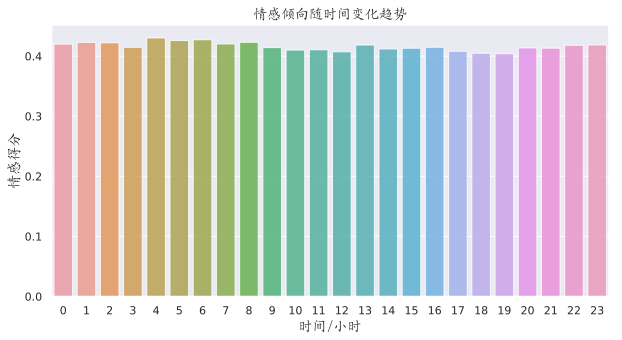

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

zhfont= FontProperties(fname='./simkai.ttf',size=14)

hour_count  = df_all['sentiment'].groupby(df_all['hour']).mean()
# city_count = city_count[:10,]

plt.figure(figsize=(10,5))
sns.set(font="simkai")
ax = sns.barplot(hour_count.index, hour_count.values, alpha=0.8)
plt.title('情感倾向随时间变化趋势',fontproperties=zhfont)
plt.ylabel('情感得分', fontsize=12,fontproperties=zhfont)
plt.xlabel('时间/小时', fontsize=12,fontproperties=zhfont)
# ax.set_xticklabels(['wcc0233', '小貔貅', 'tjmcs', '小豌豆00', '潇洒哥ing', '蓝弟弟', '贫道飞熊', '儒雅的灵魂当铺', 'kashen55573468', '不想糊涂'],rotation=45,fontsize=10,fontproperties=zhfont) 
plt.show()

In [0]:
df_all['sentiment'].groupby(df_all['dayofweek']).mean()

dayofweek
0    0.413787
1    0.413365
2    0.408575
3    0.412373
4    0.411773
5    0.416261
6    0.420551
Name: sentiment, dtype: float64

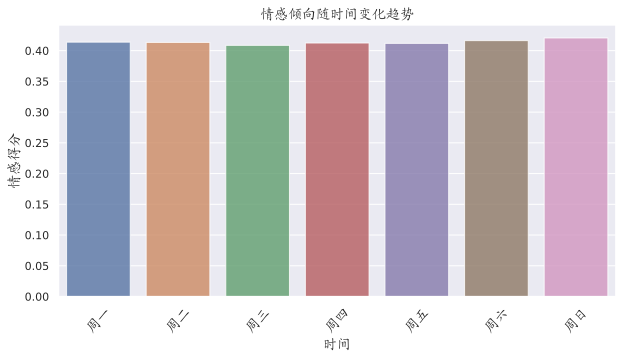

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

zhfont= FontProperties(fname='./simkai.ttf',size=14)

day_count  = df_all['sentiment'].groupby(df_all['dayofweek']).mean()
# city_count = city_count[:10,]

plt.figure(figsize=(10,5))
sns.set(font="simkai")
ax = sns.barplot(day_count.index, day_count.values, alpha=0.8)
plt.title('情感倾向随时间变化趋势',fontproperties=zhfont)
plt.ylabel('情感得分', fontsize=12,fontproperties=zhfont)
plt.xlabel('时间', fontsize=12,fontproperties=zhfont)
ax.set_xticklabels(['周一', '周二', '周三', '周四', '周五', '周六', '周日'],rotation=45,fontsize=10,fontproperties=zhfont) 
plt.show()

In [0]:
df_all.sentiment.value_counts().sort_index(ascending=True)

In [0]:
df_all.sentimentVal = df_all.sentiment.apply(lambda x: round(x,2))

In [0]:
sentiment_count = df_all.sentimentVal.value_counts().sort_index(ascending=True)
sentiment_count

0.00    18403
0.01     8750
0.02     5724
0.03     4734
0.04     4063
0.05     3618
0.06     3423
0.07     3167
0.08     2940
0.09     2853
0.10     2840
0.11     2767
0.12     2751
0.13     2314
0.14     2459
0.15     2372
0.16     2443
0.17     2374
0.18     2136
0.19     2319
0.20     2279
0.21     2047
0.22     2220
0.23     2295
0.24     2594
0.25     2540
0.26     2318
0.27     2198
0.28     2131
0.29     2152
        ...  
0.71     1777
0.72     1737
0.73     2250
0.74     1340
0.75     4420
0.76     1939
0.77     1346
0.78     1457
0.79     1286
0.80     1704
0.81     1362
0.82     1575
0.83     2252
0.84     1450
0.85     1801
0.86     2090
0.87     2547
0.88     1697
0.89     2933
0.90     1866
0.91     1696
0.92     1478
0.93     1577
0.94     1467
0.95     1736
0.96     2027
0.97     1858
0.98     2142
0.99     2149
1.00     1762
Name: sentiment, Length: 101, dtype: int64

# 所有用户情感倾向分布情况

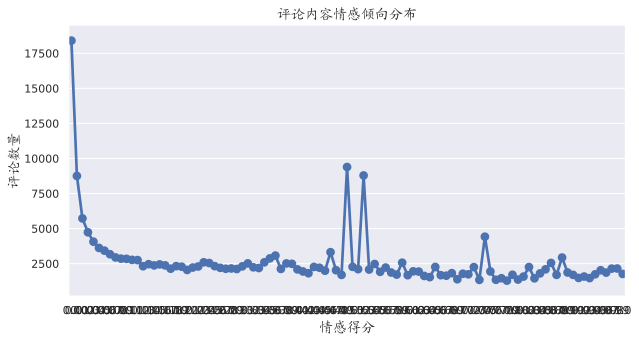

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

zhfont= FontProperties(fname='./simkai.ttf',size=14)

# sentiment_count  = df_all.sentiment.value_counts()
# city_count = city_count[:10,]

plt.figure(figsize=(10,5))
sns.set(font="simkai")

x_list = [x*0.1 for x in range(11)]

ax = sns.pointplot(sentiment_count.index, sentiment_count.values, alpha=0.8)
plt.title('评论内容情感倾向分布',fontproperties=zhfont)
plt.ylabel('评论数量', fontsize=12,fontproperties=zhfont)
plt.xlabel('情感得分', fontsize=2,fontproperties=zhfont)
# ax.set_xticklabels(['周一', '周二', '周三', '周四', '周五', '周六', '周日'],rotation=45,fontsize=10,fontproperties=zhfont) 
plt.show()

In [0]:
ax.figure.savefig("情感得分分布.jpg")

In [0]:
df_all[(df_all.sentiment >= 0.39) & (df_all.sentiment <= 0.41)].content

In [0]:
df_all.head()

In [0]:
df_all.label.value_counts()

In [0]:
df_all.to_csv('df_all_sentiment.csv', index=False)

In [0]:
df_all_sentiment = pd.read_csv('df_all_sentiment.csv', encoding='utf-8')
df_all_sentiment.head()

In [0]:
df_all_sentiment.info()

In [0]:
df_all_sentiment.isnull().sum()